# Business Overview

## What is Time Series Forecasting?
A sequence of data points collected often at a constant time interval of a given entity is known as time series. The measure question asked by any business is “how did the past influence the future?”. Forecasting is a process by which the future observation is estimated by using historical data. A statistical method that is used to analyze the data taken over time to forecast the future is known as time series forecasting. It is used to analyze time-based patterns in data and hence to determine a good model to forecast future behavior. Basically time series connect the past, present, and future.

## Use Cases / Aim
From  supply chain, stocks, biomedical monitoring etc. forecasting is used everywhere. For this project there are two main use cases for  forecasting. The first being store sales prediction to manage inventory demand and plan ahead accordingly. The second is ride-hailing demand for pricing and supply chain management. One of the importance of forecasting is if a holiday comes over how one should plan store sales to get maximum sales hence the profit.

## Data Description

The dataset used is Walmart store sales data. Walmart is an American multinational retail corporation that operates a chain of hypermarkets, department stores, and Grocery stores. The dataset provided is historical sales data for 45 Walmart stores located in different regions.  Each store contains many departments. Four different datasets are provided

- Stores.csv: This file contains information about the 45 stores,indicating the type and size of the store.
- Train.csv: This is the historical training data, which covers 2010-02-05 to 2012-11-01.
- Test.csv: This file is identical to train.csv, except for the weekly sales which have to be predicted. 
- Features.csv: This file contains additional data related to the store, department, and regional activity for the given dates. 

### Column Description
Store - the store number
Date - the week
Dept - the department number
Temperature - the average temperature in the region
Fuel_Price - the cost of fuel in the region
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011 and is not available for all stores all the time. Any missing value is marked with an NA.
CPI - the consumer price index
Unemployment - the unemployment rate
IsHoliday - whether the week is a special holiday week
Weekly_Sales -  sales for the given department in the given store

## Importing Libraries and Loading Data

In [1]:
import bamboolib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading Data
train = pd.read_csv('data/train.csv')
feature = pd.read_csv('data/features.csv')
test = pd.read_csv('data/test.csv')
stores = pd.read_csv('data/stores.csv')

In [3]:
# Merging Data
train_stores = pd.merge(train, stores)
train = pd.merge(train_stores, feature)

test_stores = pd.merge(test, stores)
test = pd.merge(test_stores, feature)

In [4]:
 # Load training data
train = train.groupby(['Store','Date']).agg({'Weekly_Sales':sum, 'IsHoliday': 'first', 
                                                          'Type': 'first', 'Size':'first', 'Temperature': 'first',
                                                          'Fuel_Price': 'first', 'MarkDown1': 'first', 'MarkDown2': 'first',
                                                          'MarkDown3': 'first', 'MarkDown4': 'first', 'MarkDown5': 'first',
                                                          'CPI': 'first', 'Unemployment': 'first'}).reset_index()
# Load testing data
test = test.groupby(['Store','Date']).agg({'IsHoliday': 'first', 
                                                          'Type': 'first', 'Size':'first', 'Temperature': 'first',
                                                          'Fuel_Price': 'first', 'MarkDown1': 'first', 'MarkDown2': 'first',
                                                          'MarkDown3': 'first', 'MarkDown4': 'first', 'MarkDown5': 'first',
                                                          'CPI': 'first', 'Unemployment': 'first'}).reset_index()

In [5]:
train.shape

(6435, 15)

In [6]:
test.shape

(1755, 14)

In [7]:
train

,Store,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1643690.90,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1641957.44,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1611968.17,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1409727.59,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1554806.68,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
6431,45,2012-10-05,733455.07,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
6432,45,2012-10-12,734464.36,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
6433,45,2012-10-19,718125.53,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [8]:
test

,Store,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,45,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
1751,45,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
1752,45,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
1753,45,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


***

## EDA - Explanatory Data Analysis

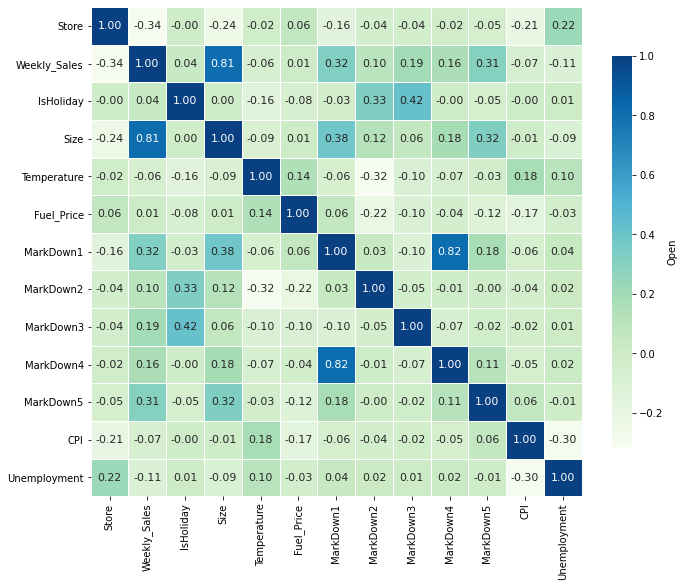

In [9]:
# Plotting train correlation heatmap
# Set up the matplotlib figure
corr = train.corr()

f, ax = plt.subplots(figsize=(11, 9))

ax = sns.heatmap(corr, cmap='GnBu', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})

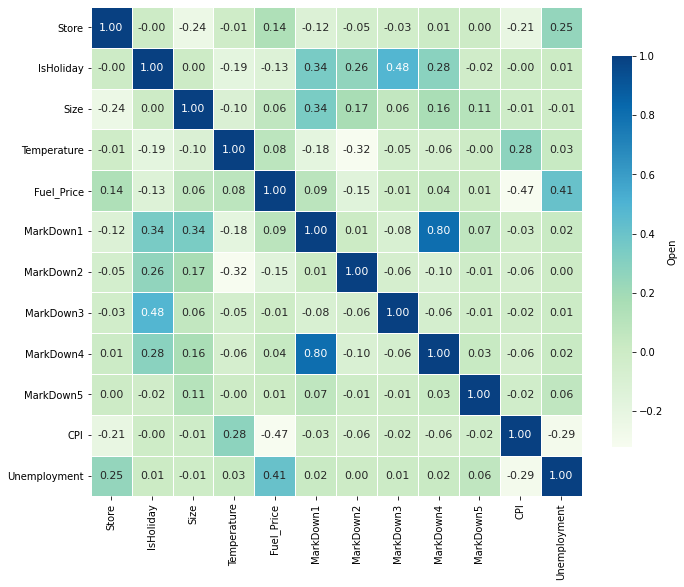

In [10]:
# Plotting correlation heatmap
# Set up the matplotlib figure
corr = test.corr()

f, ax = plt.subplots(figsize=(11, 9))

ax = sns.heatmap(corr, cmap='GnBu', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})

<AxesSubplot:xlabel='Weekly_Sales'>

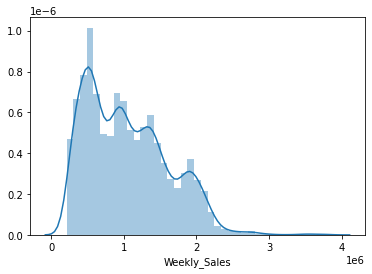

In [11]:
# Distribution of Weekly Sales of each store for each weak
sns.distplot(train.Weekly_Sales)

In [12]:
# Checking for null values
train.isna().sum()

Store              0
Date               0
Weekly_Sales       0
IsHoliday          0
Type               0
Size               0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
dtype: int64

In [13]:
train[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = train[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
train

,Store,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1643690.90,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
1,1,2010-02-12,1641957.44,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106
2,1,2010-02-19,1611968.17,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106
3,1,2010-02-26,1409727.59,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106
4,1,2010-03-05,1554806.68,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
6431,45,2012-10-05,733455.07,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667
6432,45,2012-10-12,734464.36,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667
6433,45,2012-10-19,718125.53,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667


All of the null values are within the markdown columns, different approaches will be taken into consideration on how to deal with these missing values

In [14]:
# Checking for null values
test.isna().sum()

Store             0
Date              0
IsHoliday         0
Type              0
Size              0
Temperature       0
Fuel_Price        0
MarkDown1         3
MarkDown2       471
MarkDown3       188
MarkDown4       256
MarkDown5         0
CPI             585
Unemployment    585
dtype: int64

There are null values in the markdown columns along with CPI and Unemployment columns.

- For CPI, the **mode** will be used to fill in the missing values
- For Unemployment, the **median** will be used to fill in the missing values
- For markdown, those values will be filled with 0

In [15]:
test[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = test[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
test[['CPI']] = test[['CPI']].fillna(test[['CPI']].mode().iloc[0])
test[['Unemployment']] = test[['Unemployment']].fillna(test[['Unemployment']].median())
test

,Store,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,45,2013-06-28,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,132.716097,6.806
1751,45,2013-07-05,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,132.716097,6.806
1752,45,2013-07-12,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,132.716097,6.806
1753,45,2013-07-19,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,132.716097,6.806


In [16]:
# Checking for null values
train.isna().sum()

Store           0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [17]:
# Checking for null values
test.isna().sum()

Store           0
Date            0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   IsHoliday     6435 non-null   bool   
 4   Type          6435 non-null   object 
 5   Size          6435 non-null   int64  
 6   Temperature   6435 non-null   float64
 7   Fuel_Price    6435 non-null   float64
 8   MarkDown1     6435 non-null   float64
 9   MarkDown2     6435 non-null   float64
 10  MarkDown3     6435 non-null   float64
 11  MarkDown4     6435 non-null   float64
 12  MarkDown5     6435 non-null   float64
 13  CPI           6435 non-null   float64
 14  Unemployment  6435 non-null   float64
dtypes: bool(1), float64(10), int64(2), object(2)
memory usage: 710.2+ KB


In [19]:
# Convert date to datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [20]:
# Additional Features
train['Date_dayofweek'] = train['Date'].dt.dayofweek
train['Date_month'] = train['Date'].dt.month
train['Date_year'] = train['Date'].dt.year
train['Date_day'] = train['Date'].dt.day

test['Date_dayofweek'] = test['Date'].dt.dayofweek
test['Date_month'] = test['Date'].dt.month
test['Date_year'] = test['Date'].dt.year
test['Date_day'] = test['Date'].dt.day

In [21]:
train['IsHoliday_label'] = train['IsHoliday'].factorize(sort=False, na_sentinel=-1)[0]
train = pd.get_dummies(train, columns=['Type'], drop_first=True, dummy_na=False)
train = train.drop(columns=['IsHoliday'])
train

,Store,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day,IsHoliday_label,Type_B,Type_C
0,1,2010-02-05,1643690.90,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,4,2,2010,5,0,0,0
1,1,2010-02-12,1641957.44,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,4,2,2010,12,1,0,0
2,1,2010-02-19,1611968.17,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,4,2,2010,19,0,0,0
3,1,2010-02-26,1409727.59,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,4,2,2010,26,0,0,0
4,1,2010-03-05,1554806.68,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,4,3,2010,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,4,9,2012,28,0,1,0
6431,45,2012-10-05,733455.07,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,4,10,2012,5,0,1,0
6432,45,2012-10-12,734464.36,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,4,10,2012,12,0,1,0
6433,45,2012-10-19,718125.53,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,4,10,2012,19,0,1,0


In [22]:
test['IsHoliday_label'] = test['IsHoliday'].factorize(sort=False, na_sentinel=-1)[0]
test = pd.get_dummies(test, columns=['Type'], drop_first=True, dummy_na=False)
test = test.drop(columns=['IsHoliday'])
test

,Store,Date,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day,IsHoliday_label,Type_B,Type_C
0,1,2012-11-02,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,4,11,2012,2,0,0,0
1,1,2012-11-09,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,4,11,2012,9,0,0,0
2,1,2012-11-16,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,4,11,2012,16,0,0,0
3,1,2012-11-23,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,4,11,2012,23,1,0,0
4,1,2012-11-30,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,4,11,2012,30,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,45,2013-06-28,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,132.716097,6.806,4,6,2013,28,0,1,0
1751,45,2013-07-05,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,132.716097,6.806,4,7,2013,5,0,1,0
1752,45,2013-07-12,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,132.716097,6.806,4,7,2013,12,0,1,0
1753,45,2013-07-19,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,132.716097,6.806,4,7,2013,19,0,1,0


In [23]:
train = train.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})
train

,Store,ds,y,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day,IsHoliday_label,Type_B,Type_C
0,1,2010-02-05,1643690.90,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,4,2,2010,5,0,0,0
1,1,2010-02-12,1641957.44,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,4,2,2010,12,1,0,0
2,1,2010-02-19,1611968.17,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,4,2,2010,19,0,0,0
3,1,2010-02-26,1409727.59,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,4,2,2010,26,0,0,0
4,1,2010-03-05,1554806.68,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,4,3,2010,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,4,9,2012,28,0,1,0
6431,45,2012-10-05,733455.07,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,4,10,2012,5,0,1,0
6432,45,2012-10-12,734464.36,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,4,10,2012,12,0,1,0
6433,45,2012-10-19,718125.53,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,4,10,2012,19,0,1,0


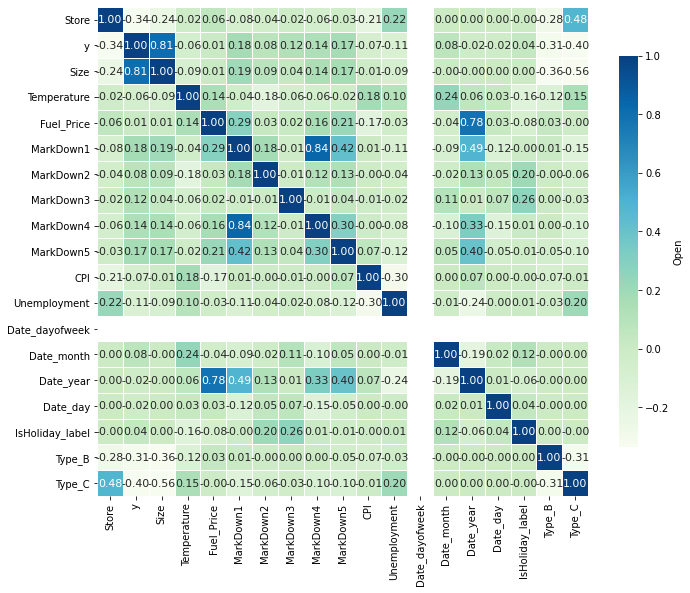

In [24]:
# Plotting train correlation heatmap
# Set up the matplotlib figure
corr = train.corr()

f, ax = plt.subplots(figsize=(11, 9))

ax = sns.heatmap(corr, cmap='GnBu', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})

In [25]:
# Setting Dataframe = Train to not mix up data
df = train

In [26]:
# Sorting Values by dt
df.sort_values(by=['ds'], inplace=True)
df

,Store,ds,y,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day,IsHoliday_label,Type_B,Type_C
0,1,2010-02-05,1643690.90,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,4,2,2010,5,0,0,0
1287,10,2010-02-05,2193048.75,126512,54.34,2.962,0.00,0.00,0.00,0.00,0.00,126.442065,9.765,4,2,2010,5,0,1,0
5148,37,2010-02-05,536006.73,39910,45.97,2.572,0.00,0.00,0.00,0.00,0.00,209.852966,8.554,4,2,2010,5,0,0,1
2288,17,2010-02-05,789036.02,93188,23.11,2.666,0.00,0.00,0.00,0.00,0.00,126.442065,6.548,4,2,2010,5,0,1,0
4147,30,2010-02-05,465108.52,42988,39.05,2.572,0.00,0.00,0.00,0.00,0.00,210.752605,8.324,4,2,2010,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,128107,56.69,3.882,4805.66,84.19,0.00,1073.49,730.76,216.151590,7.293,4,10,2012,26,0,1,0
714,5,2012-10-26,319550.77,34875,71.70,3.506,1547.61,1.74,0.00,133.31,598.74,224.037814,5.422,4,10,2012,26,0,1,0
5719,40,2012-10-26,921264.52,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,4,10,2012,26,0,0,0
2573,18,2012-10-26,1127516.25,120653,56.09,3.917,5430.61,128.31,50.00,822.64,969.64,138.728161,8.243,4,10,2012,26,0,1,0


In [27]:
df = df.set_index('ds')

<AxesSubplot:xlabel='ds'>

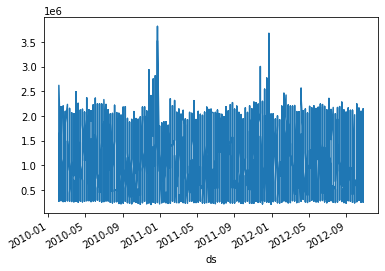

In [28]:
df['y'].plot()

In [29]:
# Exporting the datasets
#df.to_csv('dataframe.csv')

In [30]:
#train.to_csv('new_train.csv')

In [31]:
#test.to_csv('new_test.csv')

In [32]:
df_store1 = train.loc[train['Store'] == 1]
df_store1

,Store,ds,y,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Date_dayofweek,Date_month,Date_year,Date_day,IsHoliday_label,Type_B,Type_C
0,1,2010-02-05,1643690.90,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,4,2,2010,5,0,0,0
1287,10,2010-02-05,2193048.75,126512,54.34,2.962,0.00,0.00,0.00,0.00,0.00,126.442065,9.765,4,2,2010,5,0,1,0
5148,37,2010-02-05,536006.73,39910,45.97,2.572,0.00,0.00,0.00,0.00,0.00,209.852966,8.554,4,2,2010,5,0,0,1
2288,17,2010-02-05,789036.02,93188,23.11,2.666,0.00,0.00,0.00,0.00,0.00,126.442065,6.548,4,2,2010,5,0,1,0
4147,30,2010-02-05,465108.52,42988,39.05,2.572,0.00,0.00,0.00,0.00,0.00,210.752605,8.324,4,2,2010,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,128107,56.69,3.882,4805.66,84.19,0.00,1073.49,730.76,216.151590,7.293,4,10,2012,26,0,1,0
714,5,2012-10-26,319550.77,34875,71.70,3.506,1547.61,1.74,0.00,133.31,598.74,224.037814,5.422,4,10,2012,26,0,1,0
5719,40,2012-10-26,921264.52,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,4,10,2012,26,0,0,0
2573,18,2012-10-26,1127516.25,120653,56.09,3.917,5430.61,128.31,50.00,822.64,969.64,138.728161,8.243,4,10,2012,26,0,1,0


In [36]:
df_store1 = df_store1.set_index('ds')
df_store1.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='ds', length=143, freq=None)

***The rest of this project will be continued in another notebook called Modelling Notebook. This notebook is specifically for EDA***